# Introduction
This dataset is taken from <a href='https://www.kaggle.com/mohansacharya/graduate-admissions'>kaggle here</a>. The following information is directly copied from this kaggle page.

<h2>Context</h2>

<p>This dataset is created for prediction of Graduate Admissions from an Indian perspective. </p>

<h2>Content</h2>

<p>The dataset contains several parameters which are considered important during the application for Masters Programs. 
The parameters included are: <br>
1. GRE Scores ( out of 340 ) <br>
2. TOEFL Scores ( out of 120 )<br>
3. University Rating ( out of 5 )<br>
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )<br>
5. Undergraduate GPA ( out of 10 )<br>
6. Research Experience ( either 0 or 1 )<br>
7. Chance of Admit ( ranging from 0 to 1 )</p>

<h2>Acknowledgements</h2>

<p>This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
The dataset is owned by Mohan S Acharya. </p>

<h2>Inspiration</h2>

<p>This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university. </p>

<h2>Citation</h2>

<strong>Mohan S Acharya, Asfia Armaan, Aneeta S Antony: A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019</strong></p>

# Data Wrangling

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

Let's get the dataset into a pandas dataframe.

In [2]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df = data.copy()
df.tail(20)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
480,481,321,102,3,3.5,4.0,9.01,1,0.80
481,482,323,107,4,3.0,2.5,8.48,1,0.78
482,483,328,113,4,4.0,2.5,8.77,1,0.83
483,484,304,103,5,5.0,3.0,7.92,0,0.71
484,485,317,106,3,3.5,3.0,7.89,1,0.73
485,486,311,101,2,2.5,3.5,8.34,1,0.70
486,487,319,102,3,2.5,2.5,8.37,0,0.68
487,488,327,115,4,3.5,4.0,9.14,0,0.79
488,489,322,112,3,3.0,4.0,8.62,1,0.76
489,490,302,110,3,4.0,4.5,8.50,0,0.65


Dropping the 'Serial No' column.

In [4]:
df.drop('Serial No.', axis=1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Let's check for Null values.

In [5]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
df.shape

(500, 8)

In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df.columns = df.columns.str.strip()
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

Since, our dataset is clean. Let's move forward towards EDA.

# Exploratory Data Analysis (EDA)
Let's perform EDA to gain general insights from the data.

**Response Variable**: Chance of Admit

## Individual Columns' correlation with response variable

### Column: GRE Score (out of 340)

In [10]:
# Checking the correlation coefficient of GRE Score with Chance of Admit
df[['GRE Score', 'Chance of Admit']].corr()

,GRE Score,Chance of Admit
GRE Score,1.000000,0.810351
Chance of Admit,0.810351,1.000000


It seems like GRE score might be a good fit. But let's dig deeper.

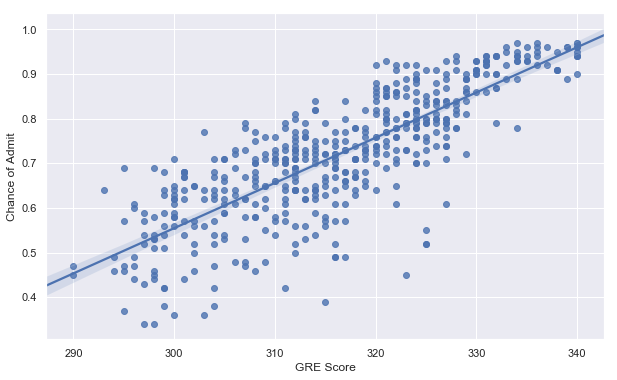

In [11]:
plt.figure(figsize=(10, 6))
sns.regplot(x='GRE Score', y='Chance of Admit', data=df)

In [12]:
from scipy import stats

In [13]:
p_coeff, p_value = stats.pearsonr(df['GRE Score'], df['Chance of Admit'])
print('Pearson Coefficient:', p_coeff)
print('P Value:            ', p_value)

Pearson Coefficient: 0.8103506354632597
P Value:             1.0884036862481872e-117


Since, pearson coefficient is quite near 1 and pvalue is a lot lesser than 0.001. This is an ideal predictor.

### Column: TOEFL Score (out of 120)

In [14]:
# Checking the correlation-coefficient
df[['TOEFL Score', 'Chance of Admit']].corr()

,TOEFL Score,Chance of Admit
TOEFL Score,1.000000,0.792228
Chance of Admit,0.792228,1.000000


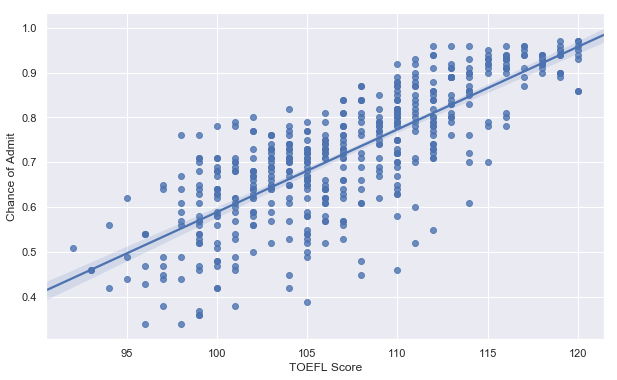

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='TOEFL Score', y='Chance of Admit')

Correlation Index seems not bad. Let's dig deeper.

In [16]:
p_coeff, p_value = stats.pearsonr(df['TOEFL Score'], df['Chance of Admit'])
print('Pearson Coefficient:', p_coeff)
print('Pearson Value:      ', p_value)

Pearson Coefficient: 0.792227614305083
Pearson Value:       6.729926762330248e-109


Since, it's pearson coefficient is almost 0.8 and pvalue is quite lesser than 0.001. This seems like an ideal candidate.

### Column: University Rating (out of 5)

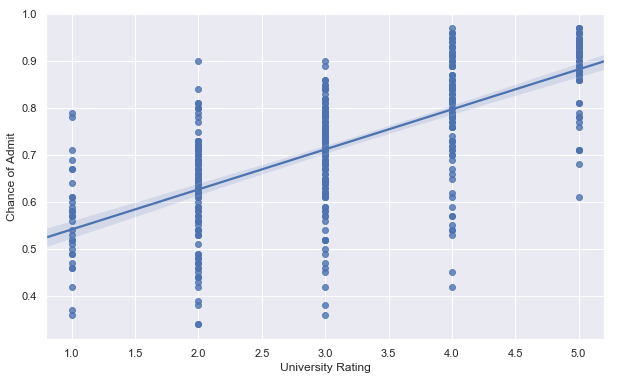

In [17]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df['University Rating'], y=df['Chance of Admit'])

Since, university rating is out of 5, let's look at it as a categorical value.

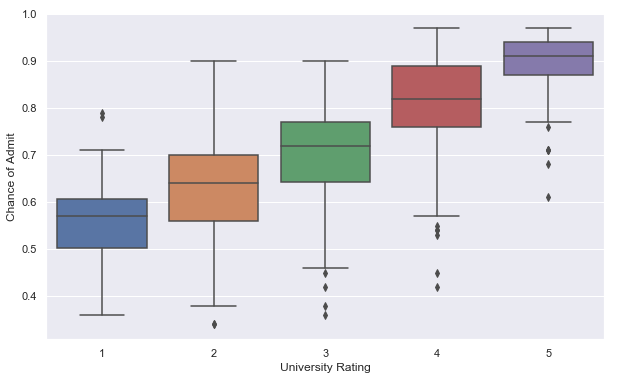

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='University Rating', y='Chance of Admit')

In [19]:
df[['University Rating', 'Chance of Admit']].corr()

,University Rating,Chance of Admit
University Rating,1.000000,0.690132
Chance of Admit,0.690132,1.000000


In [20]:
coef, pvalue = stats.pearsonr(df['University Rating'], df['Chance of Admit'])
coef, pvalue

(0.6901323687886891, 5.866255627651529e-72)

Pearson Correlation seems good. And the pvalue suggests that it is not by chance. We may consider it for the ML model.

Also, it appears we have a trend here. The higher the university rating, the higher the chance of admission. This is a good predictor of chance of admission. We'll consider it in training the model. Although, let's check the association between them using ANOVA too.

In [21]:
df_rating_grp = df[['University Rating', 'Chance of Admit']].groupby(['University Rating'])

In [22]:
f, pvalue = stats.f_oneway(df_rating_grp.get_group(1)['Chance of Admit'], 
                           df_rating_grp.get_group(2)['Chance of Admit'], 
                           df_rating_grp.get_group(3)['Chance of Admit'], 
                           df_rating_grp.get_group(4)['Chance of Admit'], 
                           df_rating_grp.get_group(5)['Chance of Admit'])

print('f oneway:', f, '\nP Value:', pvalue)

f oneway: 114.00804341400004 
P Value: 7.753395328023128e-69


ANOVA shows a very strong association between University Rating and Chance of Admit. We'll take it into model.

### Column: SOP or Statement of Purpose (out of 5)

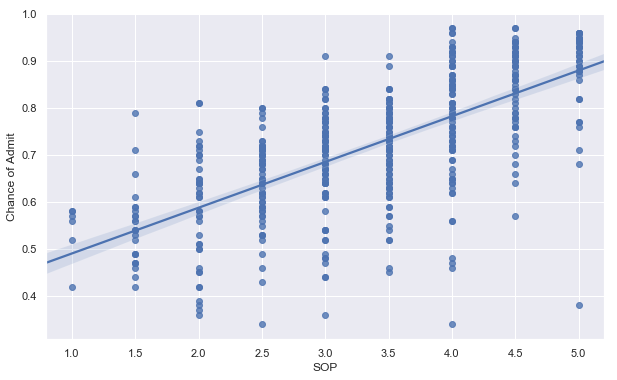

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='SOP', y='Chance of Admit')

In [24]:
df[['SOP', 'Chance of Admit']].corr()

,SOP,Chance of Admit
SOP,1.000000,0.684137
Chance of Admit,0.684137,1.000000


Let's look at it from a categorical perspective.

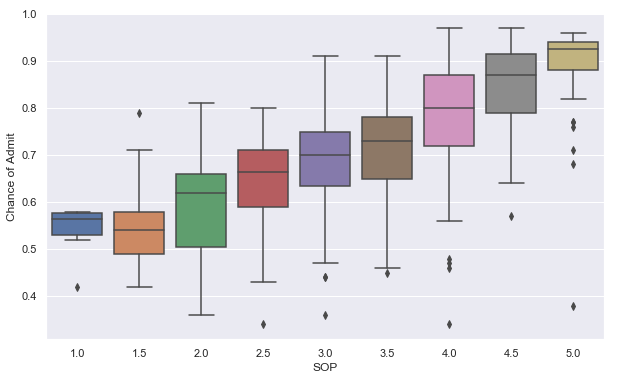

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='SOP', y='Chance of Admit')

There tends to be an increasing trend.<br>
Let's look at the pearson correlation coefficient and ANOVA.

In [26]:
p_coeff, pvalue = stats.pearsonr(df.SOP, df['Chance of Admit'])

print('Pearson Coefficient: ', p_coeff)
print('P Value:             ', pvalue)

Pearson Coefficient:  0.6841365241316723
P Value:              2.885907453455185e-70


Pearson Coefficient is not bad. Let's look at the ANOVA.

In [27]:
df_sop_grp = df[['SOP', 'Chance of Admit']].groupby(['SOP'])

In [28]:
f, pvalue = stats.f_oneway(df_sop_grp.get_group(1.0)['Chance of Admit'],
                          df_sop_grp.get_group(1.5)['Chance of Admit'],
                          df_sop_grp.get_group(2.0)['Chance of Admit'],
                          df_sop_grp.get_group(2.5)['Chance of Admit'],
                          df_sop_grp.get_group(3.0)['Chance of Admit'],
                          df_sop_grp.get_group(3.5)['Chance of Admit'],
                          df_sop_grp.get_group(4.0)['Chance of Admit'],
                          df_sop_grp.get_group(4.5)['Chance of Admit'],
                          df_sop_grp.get_group(5.0)['Chance of Admit'])

f, pvalue

(55.974076863949875, 2.18047357827063e-64)

After ANOVA, this seems like a good feature to get into model. This feature is selected.

### Column: LOR (Letter of Recommendation)

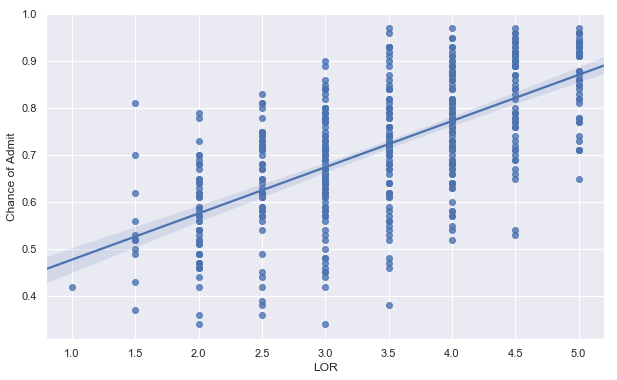

In [29]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df.LOR, y=df['Chance of Admit'])

In [30]:
df[['LOR', 'Chance of Admit']].corr()

,LOR,Chance of Admit
LOR,1.000000,0.645365
Chance of Admit,0.645365,1.000000


In [31]:
p_coeff, pvalue = stats.pearsonr(df.LOR, df['Chance of Admit'])

p_coeff, pvalue

(0.6453645135280106, 3.069932320300371e-60)

Let's check the ANOVA too.

In [32]:
df_lor_grp = df[['LOR', 'Chance of Admit']].groupby('LOR')

In [33]:
f, pvalue = stats.f_oneway(df_lor_grp.get_group(1.0)['Chance of Admit'],
                          df_lor_grp.get_group(1.5)['Chance of Admit'],
                          df_lor_grp.get_group(2.0)['Chance of Admit'],
                          df_lor_grp.get_group(2.5)['Chance of Admit'],
                          df_lor_grp.get_group(3.0)['Chance of Admit'],
                          df_lor_grp.get_group(3.5)['Chance of Admit'],
                          df_lor_grp.get_group(4.0)['Chance of Admit'],
                          df_lor_grp.get_group(4.5)['Chance of Admit'],
                          df_lor_grp.get_group(5.0)['Chance of Admit'])

f, pvalue

(44.55014196190304, 1.2475714296300813e-53)

ANOVA is not bad in this case. We'll consider column. 

### Column: CGPA

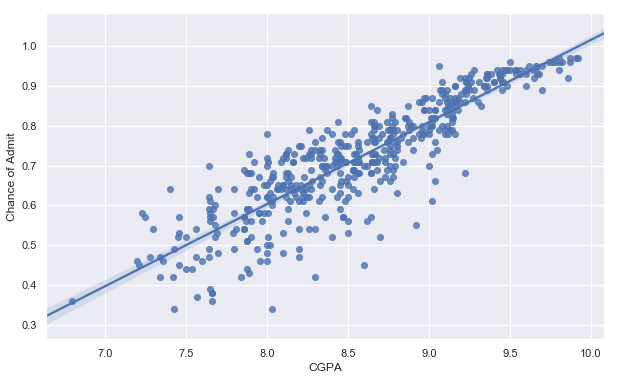

In [34]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df.CGPA, y=df['Chance of Admit'])

There appears to be quite a strong relation between CGPA and Chance of Admit.

In [35]:
df[['CGPA', 'Chance of Admit']].corr()

,CGPA,Chance of Admit
CGPA,1.000000,0.882413
Chance of Admit,0.882413,1.000000


In [36]:
p_coeff, pvalue = stats.pearsonr(df.CGPA, df['Chance of Admit'])

p_coeff, pvalue

(0.8824125749045744, 3.396544858711005e-165)

This is a very strong predictor according to the pearson score. We'll consider to get into the model.

### Column: Research

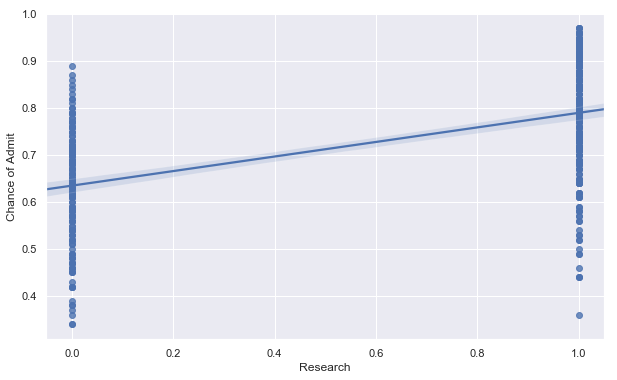

In [37]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df.Research, y=df['Chance of Admit'])

In [38]:
df[['Research', 'Chance of Admit']].corr()

,Research,Chance of Admit
Research,1.000000,0.545871
Chance of Admit,0.545871,1.000000


Since, this is a binary variable. Let's look at it in a categorical way.

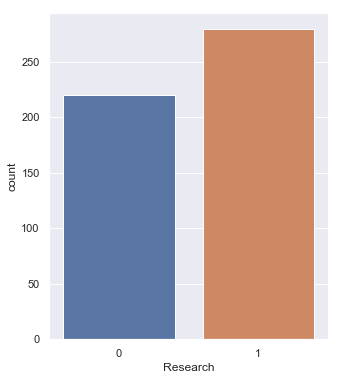

In [39]:
plt.figure(figsize=(5, 6))
sns.countplot(x=df.Research)

**Insights:** We can see that there are more candidates with research background. But without research are no less.

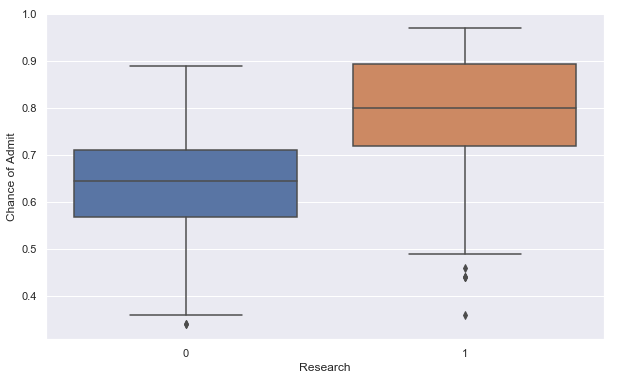

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df.Research, y=df['Chance of Admit'])

From the above box plot, we can see that the chance of admission of those having research background is more than that of those without a research background.

Let's perform ANOVA test.

In [41]:
df_res_grp = df[['Research', 'Chance of Admit']].groupby('Research')

In [42]:
f, pvalue = stats.f_oneway(df_res_grp.get_group(1)['Chance of Admit'],
                           df_res_grp.get_group(0)['Chance of Admit'])
f, pvalue

(211.37662941712796, 3.5954935458406797e-40)

## Descriptive Analytics: Analyzing predictors among themselves

Let's first check the heatmap of correlation of all the columns

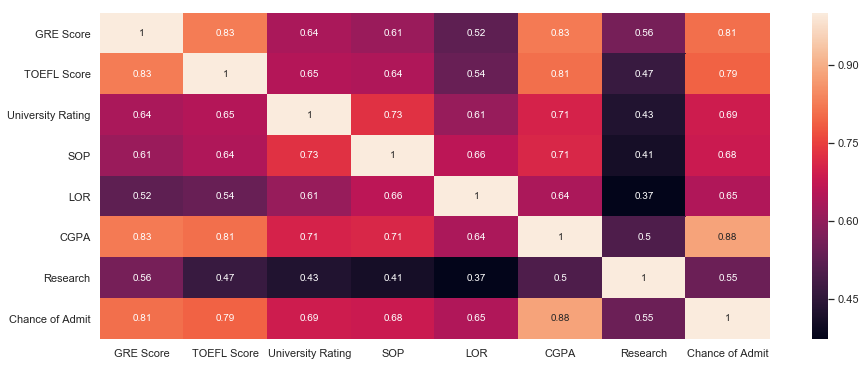

In [43]:
plt.figure(figsize=(15, 6))
sns.heatmap(data=df.corr(), annot=True)

Well, by looking at the heatmap, we can infer that there exists great **multicollinearity** in the data.

### GRE Score and CGPA

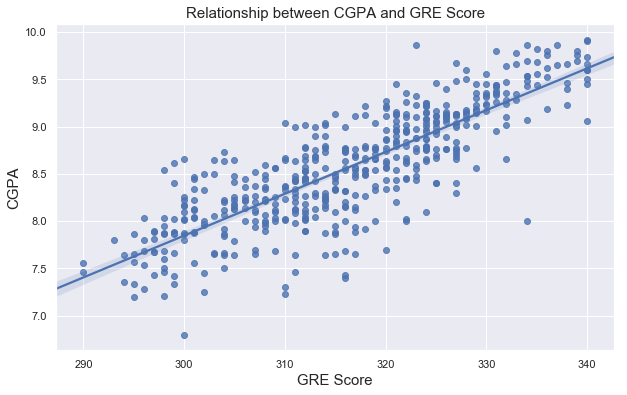

In [44]:
plt.figure(figsize=(10, 6))
plt.title('Relationship between CGPA and GRE Score', fontsize=15)
plt.xlabel('', fontsize=15)
plt.ylabel('', fontsize=15)
sns.regplot(df['GRE Score'], y=df.CGPA)

**Insights:** From the above plot, we can say that students with hig GRE Score tend to get higher CGPA.<br>
Comparing both with the 

Let's compare the above plot with 'Chance of Admission'.

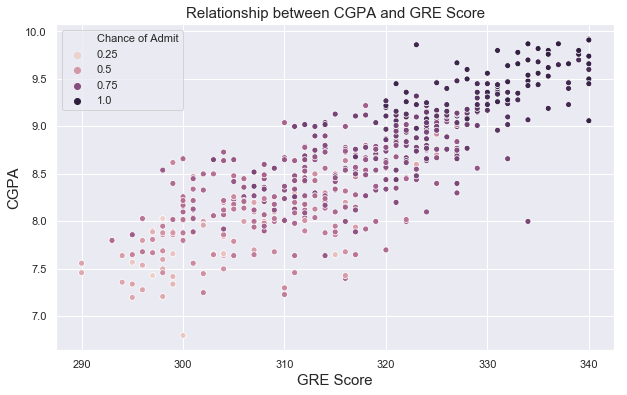

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['GRE Score'], y=df.CGPA, hue=df['Chance of Admit'])
plt.title('Relationship between CGPA and GRE Score', fontsize=15)
plt.xlabel('GRE Score', fontsize=15)
plt.ylabel('CGPA', fontsize=15)
plt.show()

Chance of admission is higher for those having greater CGPA and GRE Score.

# Predicting admissions

First of all, let's separate the label (y) from the data (x).

In [46]:
X = df.drop('Chance of Admit', axis=1)
Y = df[['Chance of Admit']]

X.shape, Y.shape

((500, 7), (500, 1))

Now, splitting the dataset into training and testing.

In [47]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, shuffle=True, test_size=0.30)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(350, 7) (350, 1)
(150, 7) (150, 1)


Now, as we know that the data is highly ```multicollinear```, we are gonna try to reduce the multicollinearity using regularization.

In [51]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(random_state=42, n_jobs=4)

lasso.fit(xtrain, ytrain)
regularized_model_prediction = lasso.predict(xtest)

Let's check the R-Squared Coefficient of it.

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_score(ytest, regularized_model_prediction)

0.8205831390252152

Okay, the score is not bad. How about increase the ```model complexity```.

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
# Checking the degree of polynomial from 1 to 6
train_r2_scores = []
test_r2_scores = []
for degree in range(1, 7):
    # Converting the features to polynomial
    model_poly = PolynomialFeatures(degree=degree)
    xtrain_poly, xtest_poly = model_poly.fit_transform(xtrain), model_poly.fit_transform(xtest)
    
    # Initializing LassoCV
    model_lasso = LassoCV(random_state=42, n_jobs=4)
    model_lasso.fit(xtrain_poly, ytrain)
    
    # Getting the training score in the list
    train_r2_scores.append(r2_score(ytrain, model_lasso.predict(xtrain_poly)))
    test_r2_scores.append(r2_score(ytest, model_lasso.predict(xtest_poly)))

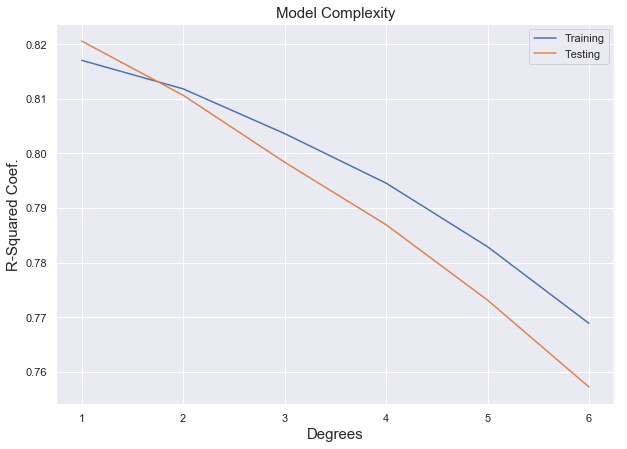

In [71]:
plt.figure(figsize=(10, 7))
sns.lineplot(x=range(1, 7), y=train_r2_scores, label='Training')
sns.lineplot(x=range(1, 7), y=test_r2_scores, label='Testing')
plt.xlabel('Degrees', fontsize=15)
plt.ylabel('R-Squared Coef.', fontsize=15)
plt.title('Model Complexity', fontsize=15)
plt.show()

In [72]:
list(zip(train_r2_scores, test_r2_scores))

[(0.817056397862837, 0.8205831390252152),
 (0.8118252950330801, 0.8106546294010814),
 (0.8036328552457941, 0.7983888922316116),
 (0.7945552028478606, 0.786931798126712),
 (0.7828994245859594, 0.77311896416033),
 (0.7688489667890382, 0.757186631197195)]